## Feature Selection & Encoding - Recursive Feature Elimination Approach to Dimensionality Reduction

In [1]:
# Import the libraries needed

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [2]:
# ******************************************************
# TWO CHANGES NEED TO BE MADE TO THIS NOTEBOOK IF 'RACE'
# ATTRIBUTE IS INCLUDED
# ******************************************************

In [3]:
# Read in the dataset passed from the last module

data = pd.read_csv('Mod_2_data_to_pass.csv')

In [4]:
# Checking data types before proceeding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    99343 non-null  object
 1   age                       99343 non-null  object
 2   admission_type_id         99343 non-null  object
 3   discharge_disposition_id  99343 non-null  int64 
 4   time_in_hospital          99343 non-null  int64 
 5   num_lab_procedures        99343 non-null  int64 
 6   num_procedures            99343 non-null  int64 
 7   num_medications           99343 non-null  int64 
 8   number_outpatient         99343 non-null  int64 
 9   number_emergency          99343 non-null  int64 
 10  number_inpatient          99343 non-null  int64 
 11  diag_1                    99323 non-null  object
 12  diag_2                    98987 non-null  object
 13  diag_3                    97924 non-null  object
 14  number_diagnoses      

In [5]:
# Change data types to categories

cat_list = ['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
            'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'change',
           'diabetesMed', 'readmitted', 'Meglitinides', 'Thiazolidinediones',
           'Sulfonylureas', 'AG_Inhibitors', 'Metformin', 'Insulin', 'Admission_Source']

#cat_list.append('race')

for item in cat_list:
    data[item] = data[item].astype('category')



In [6]:
# Confirming data types have been changed to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    99343 non-null  category
 1   age                       99343 non-null  category
 2   admission_type_id         99343 non-null  category
 3   discharge_disposition_id  99343 non-null  category
 4   time_in_hospital          99343 non-null  int64   
 5   num_lab_procedures        99343 non-null  int64   
 6   num_procedures            99343 non-null  int64   
 7   num_medications           99343 non-null  int64   
 8   number_outpatient         99343 non-null  int64   
 9   number_emergency          99343 non-null  int64   
 10  number_inpatient          99343 non-null  int64   
 11  diag_1                    99323 non-null  category
 12  diag_2                    98987 non-null  category
 13  diag_3                    97924 non-null  cate

In [7]:
# Three attributes contain NaN data so they need to be removed from the dataset
# Remove diag_1, diag_2 and diag_3 due to NaN
data = data.drop('diag_1', axis = 1)
data = data.drop('diag_2', axis = 1)
data = data.drop('diag_3', axis = 1)

## One Hot Encoding

In [8]:
# APPROACH 1
# USING OneHotEncoder TO GENERATE DUMMY VARIABLES
# ONE HOT ENCODING IN A LOOP TO BINARIZE CATEGORICAL ATTRIBUTES

'''
# Create one hot encoder (start the tool)
# ?? Don't understand what 'sparse_output = False' does
encoder = OneHotEncoder(sparse_output = False, dtype = np.int)

# Create a new dataframe to store the one-hot encoded data
encoded_dataframes = []

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

for column in cat_columns:
    # Get data to be encoded from original dataset
    column_data = data[[column]]

    # Use the encoder
    encoded_data = encoder.fit_transform(column_data)

    # Create a temporary dataframe to hold encoded data
    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.get_feature_names_out([column]))

    # Add the encoded dataframe to the list created above
    encoded_dataframes.append(temp_encoded_data)

# Concat all the encoded dataframes in the temp_encoded_data list
completed_dataframe = pd.concat(encoded_dataframes, axis = 1)

# Remove the original columns from test3
data_copy = data.copy()
data_copy = data_copy.drop(cat_columns, axis = 1)


# Put the remaining original data columns together with the encoded dataframe
data = pd.concat([data_copy, completed_dataframe], axis=1)

# Confirming binarizing was done correctly and verifying new number of attributes

display(data.info())

display(data)

'''

"\n# Create one hot encoder (start the tool)\n# ?? Don't understand what 'sparse_output = False' does\nencoder = OneHotEncoder(sparse_output = False, dtype = np.int)\n\n# Create a new dataframe to store the one-hot encoded data\nencoded_dataframes = []\n\n# Create a list of all the categorical columns to be one-hot encoded\ncat_columns = ['gender', 'age', 'admission_type_id',\n               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',\n               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',\n               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',\n               'diabetesMed', 'Admission_Source']\n\n#cat_columns.append('race')\n\nfor column in cat_columns:\n    # Get data to be encoded from original dataset\n    column_data = data[[column]]\n\n    # Use the encoder\n    encoded_data = encoder.fit_transform(column_data)\n\n    # Create a temporary dataframe to hold encoded data\n    temp_encoded_data = pd.DataFrame(encoded_data, columns = encoder.ge

In [9]:
# APPROACH 2
# USING GET_DUMMIES TO GENERATE DUMMY VARIABLES
# USING THE PACKAGE WITHOUT A LOOP TO BINARIZE CATEGORICAL ATTRIBUTES

# Create a list of all the categorical columns to be one-hot encoded
cat_columns = ['gender', 'age', 'admission_type_id',
               'discharge_disposition_id', 'max_glu_serum', 'A1Cresult',
               'Meglitinides', 'Thiazolidinediones', 'Sulfonylureas',
               'AG_Inhibitors', 'Metformin', 'Insulin', 'change',
               'diabetesMed', 'Admission_Source']

#cat_columns.append('race')

data = pd.get_dummies(data,columns=cat_columns, dtype = int)

# Confirming binarizing was done correctly and verifying new number of attributes

display(data.info())

display(data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  int64   
 1   num_lab_procedures               99343 non-null  int64   
 2   num_procedures                   99343 non-null  int64   
 3   num_medications                  99343 non-null  int64   
 4   number_outpatient                99343 non-null  int64   
 5   number_emergency                 99343 non-null  int64   
 6   number_inpatient                 99343 non-null  int64   
 7   number_diagnoses                 99343 non-null  int64   
 8   readmitted                       99343 non-null  category
 9   gender_Female                    99343 non-null  int32   
 10  gender_Male                      99343 non-null  int32   
 11  gender_Missing                   99343 non-null  int32   
 12  age_

None

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,gender_Female,...,Insulin_Steady,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes,Admission_Source_Emerg_Dept,Admission_Source_Missing,Admission_Source_Other,Admission_Source_Referral,Admission_Source_Transfer
0,1,41,0,1,0,0,0,1,NO,1,...,0,0,1,1,0,0,0,0,1,0
1,3,59,0,18,0,0,0,9,>30,1,...,0,1,0,0,1,1,0,0,0,0
2,2,11,5,13,2,0,1,6,NO,1,...,0,0,1,0,1,1,0,0,0,0
3,2,44,1,16,0,0,0,7,NO,0,...,0,1,0,0,1,1,0,0,0,0
4,1,51,0,8,0,0,0,5,NO,0,...,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99338,3,51,0,16,0,0,0,9,>30,0,...,0,1,0,0,1,1,0,0,0,0
99339,5,33,3,18,0,0,1,9,NO,1,...,1,0,1,0,1,0,0,0,0,1
99340,1,53,0,9,1,0,0,13,NO,0,...,0,1,0,0,1,1,0,0,0,0
99341,10,45,2,21,0,0,1,9,NO,1,...,0,1,0,0,1,1,0,0,0,0


## Feature Scaling of Quantitative Attributes

In [10]:
# Create a list of the quantitative attributes

quantList = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
             'num_medications', 'number_outpatient', 'number_emergency',
             'number_inpatient', 'number_diagnoses']

# Instantiate the StandardScaler tool
scaler = StandardScaler()

# Scaling the numerical attributes listed in quantList in the training
# set using the StandardScaler

data[quantList] = scaler.fit_transform(data[quantList])

In [11]:
# Confirming the data has been scaled in the training set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99343 entries, 0 to 99342
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   time_in_hospital                 99343 non-null  float64 
 1   num_lab_procedures               99343 non-null  float64 
 2   num_procedures                   99343 non-null  float64 
 3   num_medications                  99343 non-null  float64 
 4   number_outpatient                99343 non-null  float64 
 5   number_emergency                 99343 non-null  float64 
 6   number_inpatient                 99343 non-null  float64 
 7   number_diagnoses                 99343 non-null  float64 
 8   readmitted                       99343 non-null  category
 9   gender_Female                    99343 non-null  int32   
 10  gender_Male                      99343 non-null  int32   
 11  gender_Missing                   99343 non-null  int32   
 12  age_

## Split Data into Train and Test Sets

In [12]:
# Select all the features except the target variable
X = data.drop('readmitted', axis = 1)
#print(X.info())

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, data['readmitted'], test_size = 0.2, random_state=53)

In [13]:
# Confirming the size of the training and test sets

print('X_train size\n', X_train.shape)

print('\nX_test size\n', X_test.shape)

X_train size
 (79474, 75)

X_test size
 (19869, 75)


## SMOTE

In [14]:
# Using SMOTE (Synthetic Minority Over-sampling TEchnique) to address the
# class imbalance problem.
# SMOTE generates synthetic rows for the minority class in the training set
smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [15]:
# Checking the size of the y training dataset before SMOTE was applied
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 79474 entries, 60411 to 56857
Series name: readmitted
Non-Null Count  Dtype   
--------------  -----   
79474 non-null  category
dtypes: category(1)
memory usage: 698.6 KB


In [16]:
# Checking the size of the y training dataset after SMOTE was applied
Y_train_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 125919 entries, 0 to 125918
Series name: readmitted
Non-Null Count   Dtype   
--------------   -----   
125919 non-null  category
dtypes: category(1)
memory usage: 123.2 KB


## Feature Importance from Tree-Based Models

In [17]:
# USING RECURSIVE FEATURE ELIMINATION TO CONDUCT FEATURE IMPORTANCE ANALYSIS

start_time = time.time()

# Create a decision tree classifier
base_model = DecisionTreeClassifier()

# Set up the RFE model with the desired number of features
rfe = RFE(estimator = base_model, n_features_to_select = 25)
X_RFE = rfe.fit_transform(X_train_resampled, Y_train_resampled)

# Get the mask of selected features
selected_feature_indices = rfe.support_

# Get the selected feature names from the original dataframe
selected_features = X_train_resampled.columns[selected_feature_indices]

# Print the selected features
print('Selected features:', selected_features)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')

Selected features: Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'gender_Female', 'gender_Male',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'admission_type_id_Emergency', 'admission_type_id_Urgent',
       'discharge_disposition_id_1', 'Insulin_Adjusted', 'Insulin_No',
       'Insulin_Steady', 'change_Ch', 'change_No', 'diabetesMed_No',
       'Admission_Source_Emerg_Dept', 'Admission_Source_Referral'],
      dtype='object')
Time taken: 88.59312295913696 seconds


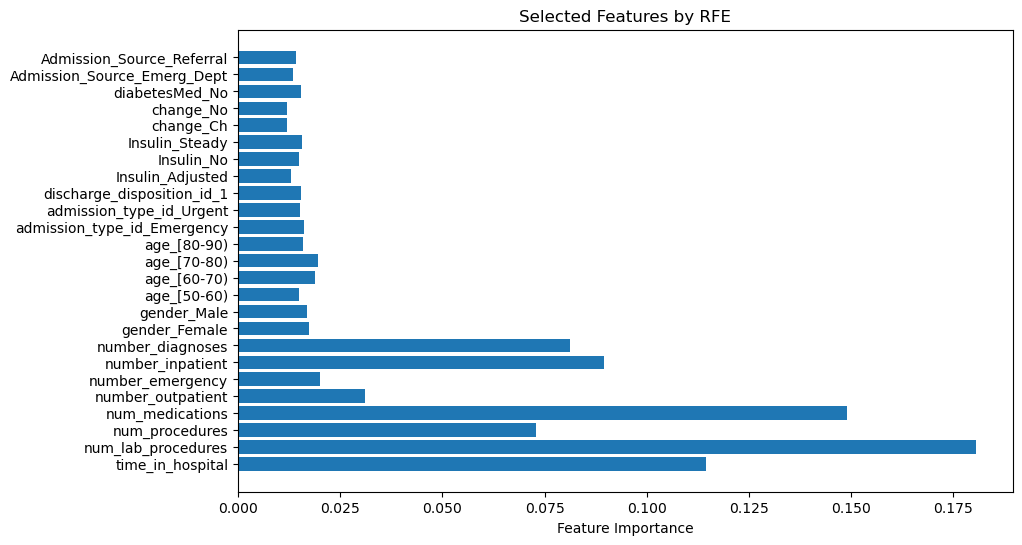

In [18]:
# Create a bar chart to visualize the selected features
plt.figure(figsize = (10,6))
plt.barh(selected_features, rfe.estimator_.feature_importances_)

plt.xlabel('Feature Importance')
plt.title('Selected Features by RFE')
plt.show()

In [19]:
# Make changes to X datasets

# Select only the top 25 features from X_train
X_train_RFE = X_train_resampled[selected_features]

# Make changes to X_test dataset
X_test_RFE = X_test[selected_features]

In [20]:
X_test_RFE.head(10)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Female,gender_Male,...,admission_type_id_Urgent,discharge_disposition_id_1,Insulin_Adjusted,Insulin_No,Insulin_Steady,change_Ch,change_No,diabetesMed_No,Admission_Source_Emerg_Dept,Admission_Source_Referral
95355,-1.138438,-0.556461,-0.783565,0.014118,-0.362387,1.589484,1.224085,-0.723427,0,1,...,0,0,0,1,0,0,1,1,1,0
46659,-1.138438,-0.148028,-0.783565,-1.409226,-0.362387,-0.313136,-0.538679,-0.206759,0,1,...,0,1,0,1,0,0,1,1,1,0
56375,-0.464673,-0.811731,0.978263,0.661092,-0.362387,-0.313136,0.342703,0.826575,0,1,...,0,1,1,0,0,1,0,0,0,1
13936,0.545975,0.056188,1.565539,0.143513,-0.362387,-0.313136,-0.538679,0.826575,1,0,...,0,1,0,0,1,0,1,0,1,0
33013,-0.464673,0.413566,-0.196289,0.402303,-0.362387,-0.313136,1.224085,0.826575,1,0,...,0,1,0,1,0,1,0,0,1,0
41204,2.567270,-0.352244,0.390987,1.437462,-0.362387,-0.313136,-0.538679,0.826575,1,0,...,0,0,1,0,0,1,0,0,0,0
32743,0.209092,1.996242,0.390987,0.143513,1.836058,-0.313136,-0.538679,0.826575,1,0,...,0,1,0,1,0,0,1,0,1,0
29169,1.893505,-0.352244,-0.783565,-0.374067,-0.362387,-0.313136,-0.538679,-1.240094,0,1,...,1,1,0,0,1,0,1,0,0,0
78102,-0.801555,0.770945,-0.783565,1.178672,-0.362387,5.394725,3.868231,0.826575,1,0,...,0,1,0,1,0,0,1,0,1,0
82347,-0.127790,1.026215,-0.783565,-0.115277,-0.362387,-0.313136,-0.538679,0.826575,0,1,...,1,0,0,0,1,1,0,0,0,0


In [21]:
# Confirming the size of the datasets

print('X_test ', X_test_RFE.shape)
print('Y_test ', Y_test.shape)
print('X_train ', X_train_RFE.shape)
print('Y_train ', Y_train_resampled.shape)

X_test  (19869, 25)
Y_test  (19869,)
X_train  (125919, 25)
Y_train  (125919,)


## Exporting Data to Next Step

In [22]:
# Export data to Model Building & Evaluation Notebook for RFE

X_train_RFE.to_csv('Mod_3_X_train_RFE.csv', index = False)
X_test_RFE.to_csv('Mod_3_X_test_RFE.csv', index = False)
Y_train_resampled.to_csv('Mod_3_Y_train_RFE.csv', index = False)
Y_test.to_csv('Mod_3_Y_test_RFE.csv', index = False)